# Sentimental Analysis

## we will check the tweet sentiment is positive tweet or a negative tweet

# Importing the data

### installing Kaggle Library

In [1]:
!pip install kaggle

### Upload the kaggle.json file




In [2]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


### Important Twitter Sentiment dataset

In [3]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140



Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 95% 77.0M/80.9M [00:01<00:00, 80.0MB/s]
100% 80.9M/80.9M [00:01<00:00, 61.6MB/s]


### Extracting the zip file with the needed columns for desired output

In [4]:
from zipfile import ZipFile
dataset ='/content/sentiment140.zip'

# we have to open the file and extract the file
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the data set is extracted")

the data set is extracted


# Data preprocessing

## importing the Dependencies/Libraries


In [5]:
import numpy as np
import pandas as pd
import re
#nltk = natural language tool kit
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer #conert textual to muneical data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
#printing the stopwords
print(stopwords.words('english'))
#these are the words which are not required for us in the processing of the data

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Loading the data fro pandas to csv file to pandas dataframe

In [8]:
twitter_data = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding ='ISO-8859-1')

In [9]:
twitter_data.shape

(1599999, 6)

there are 16 lack tweets and 6 columns

In [10]:
twitter_data.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Naming the colums

In [11]:
colum_names = ['target','id','date','flag','user','text']
twitter_data = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",names=colum_names, encoding ='ISO-8859-1')
twitter_data.head(5)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
twitter_data.shape

(1600000, 6)

In [13]:
#checking the missing values in the data
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [14]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [15]:
#checking the distrubution of target column
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

### converting the target value

In [16]:
#converting the targeted label (4--> 1)
twitter_data.replace({"target":{4:1}},inplace=True)

In [17]:
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

if label is 0 then negative tweet

if label is 4 then positive tweet

if the distrubution is not even we have to do up sampling or down sampling for making the data evenly distrubuted

## stemming

stemming is the process of reducing the word to its keyword /Root word

example = actor,actress,acting  = act

it reduces the complexity of the data

In [18]:
port_stem = PorterStemmer()

In [19]:
def stemming(content):
  #we will be removing the word which doesnt belong to the given condition (@ ,2 ,!)
  stemmed_content = re.sub("[^a-zA-Z]",' ',content)
  # we are conerting the lower case
  stemmed_content = stemmed_content.lower()
   # we will split it and store it into list
  stemmed_content = stemmed_content.split()
  #reducing the word to its root word (port stem)
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  # we are jopining the tweet back again one by one
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

### we are adding a new column

In [ ]:
twitter_data["stemmed_content"]= twitter_data['text'].apply(stemming)

In [ ]:
twitter_data.head(5)

In [ ]:
print(twitter_data['stemmed_content'])

In [ ]:
print(twitter_data['target'])

### we are seperating the data and label

In [ ]:
x = twitter_data['stemmed_content'].values
y = twitter_data['target'].values

In [ ]:
print(x)

In [ ]:
print(y)

# Train-Test split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, stratify = y,random_state=42) #stratify = equal distrubution of 0 and 1 in train and test data

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

In [ ]:
print(y.shape,y_train.shape,y_test.shape)

In [ ]:
print(x_test)

## converting the textual data to numerical data

with the help of feature extraction

example: color is a word in my data so it checks how many times does the fine or other word has occured based on it it gives the important values

FIT = understands the nature of data and fits into vectore form

In [ ]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [ ]:
print(X_train)

set 0 represents tht the data importance in the 1st tweet

In [ ]:
print(X_test)

# Training the Machine Learning Model

In [ ]:
model = LogisticRegression(max_iter=1000)

In [35]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

Accuracy score

In [36]:
# accuracy score on the training data
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [37]:
print("Accuracy score on the training data :",training_data_accuracy )

Accuracy score on the training data : 0.81021171875


## Acuracy score ontest data

In [38]:
x_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [39]:
print("Accuracy score on the test data :",test_data_accuracy )

Accuracy score on the test data : 0.778690625


model = 77.8% a good one

# Saving the model and utilizing the model again


## save the model




In [40]:
import pickle

we can also use .pk pickle or sav as save model

In [41]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename, "wb"))
# model is the name of instance
#wb = writting the file

## utilize the model

In [42]:
#load the model
loaded_model = pickle.load(open("/content/trained_model.sav",'rb'))

# Checking on the new predictions

In [43]:
X_new = X_test[765]
print(X_new)

  (0, 388491)	0.5677679342965701
  (0, 274486)	0.44365455904543916
  (0, 159573)	0.467858678479078
  (0, 124807)	0.5117797006472737


In [44]:
Y_new = y_test[765]
print(Y_new)

1


In [45]:
X_new_prediction = loaded_model.predict(X_new)
print(X_new_prediction)

if (X_new_prediction[0]==1):
  print("Positive tweet")
else:
  print("Negative tweet")

[1]
Positive tweet


### class distrubution

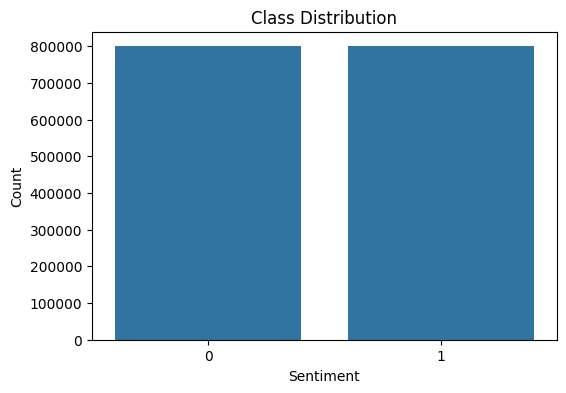

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=twitter_data)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


### model performance

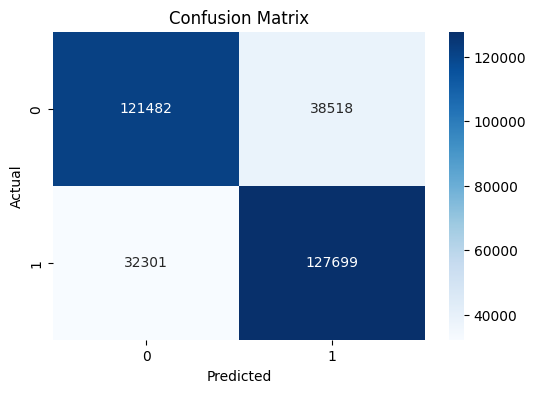

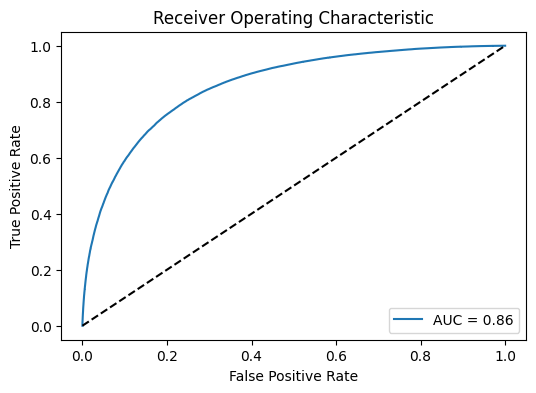

In [47]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
y_pred = loaded_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, loaded_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
